# k-Nearest Neighbors Model

K-Nearest Neighbor (KNN) algorithm is a distance based supervised learning algorithm that is used for solving classification problems.

In this, we will be looking at the classes of the k nearest neighbors to a new point and assign it the class to which the majority of k neighbours belong too.

To identify the nearest neighbors we use various techniques of measuring distance, the most common of them being the ‘Euclidean Distance’.


----------------------------------------------------------------------------------------------

K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning. 

It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

This algorithm is used to solve the classification model problems.

K-nearest neighbor or K-NN algorithm basically creates an imaginary boundary to classify the data.

When new data points come in, the algorithm will try to predict that to the nearest of the boundary line.

K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

There are various methods for calculating this distance, of which the most commonly known methods are – Euclidian, Manhattan (for continuous) and Hamming distance (for categorical).

https://www.analyticsvidhya.com/wp-content/uploads/2014/10/scenario1.png

https://www.analyticsvidhya.com/wp-content/uploads/2014/10/scenario2.png

Therefore, larger k value means smother curves of separation resulting in less complex models. Whereas, smaller k value tends to overfit the data and resulting in complex models.

Note: It’s very important to have the right k-value when analyzing the dataset to avoid overfitting and underfitting of the dataset.

Using the k-nearest neighbor algorithm we fit the historical data (or train the model) and predict the future.


In [1]:
# k is the positive integer (Supervised/ Classification)
# Nearest neighbor
# finding the neighbor based upon the distance
# if the distance is less
# A (2,5)
# B(6,9)
# C(7,11)
# D(11, 20)
# FIND THE NEIGHBOUR OF A............HOW?
# DISTANCE BETWEEN A&B, A&C, A&D LESS DISTANCE WILL BE THE NEIGHBOUR POINTS
# k IS THE HYPER PARAMETER - USER NEEDS TO PROVIDE THE DATA

In [1]:
import pandas as pd
cr =  pd.read_csv("CreditRisk.csv")

In [7]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
cr.isnull().sum() # null values

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
cr.Gender        = cr.Gender.fillna('Male')
cr.Self_Employed = cr.Self_Employed.fillna('Yes')
cr.Credit_History =  cr.Credit_History.fillna(0)
cr.Dependents  = cr.Dependents.fillna(0)
cr.LoanAmount  = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term  = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Married           = cr.Married.fillna("Yes")

In [10]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
cr.Gender.replace({"Male" :1 , "Female":0} ,inplace = True)
cr.Married.replace({"No" :0 , "Yes":1} , inplace = True)
cr.Education.replace({"Graduate" :1  , "Not Graduate":0} , inplace = True)
cr.Self_Employed.replace({"No":0 , "Yes" :1 }, inplace = True)
cr.Property_Area.replace({"Semiurban" :1 ,"Urban": 2 , "Rural" :3} , inplace = True)
cr.Loan_Status.replace({"Y" :1 , "N" : 0}, inplace = True)

In [12]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2,1


In [13]:
cr_x = cr.iloc[: ,1:12]
cr_y = cr.iloc[: , -1]

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
cr_x_train , cr_x_test ,cr_y_train , cr_y_test = train_test_split(cr_x , cr_y , test_size = .2 , random_state = 101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors= 6)

In [17]:
knn.fit(cr_x_train , cr_y_train)

KNeighborsClassifier(n_neighbors=6)

In [18]:
pred_knn = knn.predict(cr_x_test)
pred_knn

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred_knn , cr_y_test)
tab1
tab1.diagonal().sum() / tab1.sum() * 100

64.9746192893401

In [20]:
# How to find the K value? when you run your model then only we can decide...........
# Do the trade off between accuracy and stability
# find the accuracy for various values of K and then plot them
# intention is to create a stable model / not a unstable model
# prefer on the stable model

In [24]:
aa = list() # empty list
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(cr_x_train , cr_y_train)
    pred_knn = knn.predict(cr_x_test)
    tab =confusion_matrix(pred_knn , cr_y_test)
    acc = tab.diagonal().sum() / tab.sum() 
    aa.append(acc)

In [25]:
aa

[0.6548223350253807,
 0.6040609137055838,
 0.649746192893401,
 0.6345177664974619,
 0.6802030456852792,
 0.649746192893401,
 0.6700507614213198,
 0.6598984771573604,
 0.700507614213198,
 0.6954314720812182,
 0.700507614213198,
 0.7106598984771574,
 0.7208121827411168,
 0.7055837563451777,
 0.7258883248730964,
 0.7055837563451777,
 0.7208121827411168,
 0.7157360406091371,
 0.7208121827411168,
 0.7208121827411168,
 0.7157360406091371,
 0.7157360406091371,
 0.7258883248730964,
 0.7258883248730964,
 0.7157360406091371,
 0.7157360406091371,
 0.7157360406091371,
 0.7157360406091371,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.7106598984771574,
 0.71065989847715

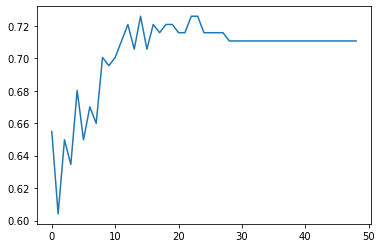

In [19]:
import matplotlib.pyplot as plt
plt.plot(aa)

In [ ]:
#what is the value of k should be taken?????
#prefer the stable k value....>30

In [20]:
knn = KNeighborsClassifier(n_neighbors= 31)
knn.fit(cr_x_train , cr_y_train)

KNeighborsClassifier(n_neighbors=31)

In [21]:
pred_knn = knn.predict(cr_x_test)
pred_knn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred_knn , cr_y_test)
tab1
tab1.diagonal().sum() / tab1.sum() * 100

71.06598984771574